Crop Disease Prediction

Importing libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
pip install tensorflow



Data Preprocessing

Training Image preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.



Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


To avoid Overshooting Loss function

1.Choose small learning rate default 0.001 here we have taken 0.0001

2.There may be chance of underfitting so increase number of neuron

3.Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

Building Model

In [6]:
cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

d:\python\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [17]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

Compiling and Training Phase

In [19]:

from keras.optimizers import Adam   # or tf.keras.optimizers.Adam

cnn.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4035s 2s/step - accuracy: 0.5413 - loss: 1.5621 - val_accuracy: 0.8228 - val_loss: 0.5748
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3395s 2s/step - accuracy: 0.8394 - loss: 0.5078 - val_accuracy: 0.9024 - val_loss: 0.3042
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4185s 2s/step - accuracy: 0.9032 - loss: 0.3011 - val_accuracy: 0.9300 - val_loss: 0.2138
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3635s 2s/step - accuracy: 0.9323 - loss: 0.2068 - val_accuracy: 0.9475 - val_loss: 0.1653
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6178s 3s/step - accuracy: 0.9483 - loss: 0.1567 - val_accuracy: 0.9348 - val_loss: 0.2238
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6712s 3s/step - accuracy: 0.9605 - loss: 0.1197 - val_accuracy: 0.9666 - val_loss: 0.1065
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2919s 1s/step - accuracy: 0.9670 - loss: 0.0997 - val_accuracy: 0.9608 - val_loss: 0.1258
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2562s 1s/step - accuracy: 0.9721 -

Evaluating Model

In [22]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1698s 772ms/step - accuracy: 0.9912 - loss: 0.0252
Training accuracy: 0.9911800026893616


In [23]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 421s 765ms/step - accuracy: 0.9706 - loss: 0.0980
Validation accuracy: 0.9705781936645508


Saving Model

In [24]:
cnn.save('trained_Crop_disease_model.keras')

In [25]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5413187146186829,
  0.8393911123275757,
  0.9031937122344971,
  0.9323280453681946,
  0.9483320116996765,
  0.9604666233062744,
  0.9670104384422302,
  0.9721032977104187,
  0.9776228666305542,
  0.9804680347442627],
 'loss': [1.5620867013931274,
  0.5077951550483704,
  0.30106908082962036,
  0.20681537687778473,
  0.15668003261089325,
  0.11973822116851807,
  0.09971200674772263,
  0.085894376039505,
  0.06952907145023346,
  0.06146688759326935],
 'val_accuracy': [0.822786271572113,
  0.9024015665054321,
  0.9300022721290588,
  0.9474732279777527,
  0.9348395466804504,
  0.9665945768356323,
  0.9607899188995361,
  0.965228796005249,
  0.9714887142181396,
  0.9705781936645508],
 'val_loss': [0.5747568011283875,
  0.30424314737319946,
  0.21377618610858917,
  0.16531391441822052,
  0.22382020950317383,
  0.1065257117152214,
  0.12583424150943756,
  0.11077813804149628,
  0.09831765294075012,
  0.09797762334346771]}

In [26]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)


In [27]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Accuracy Visualization

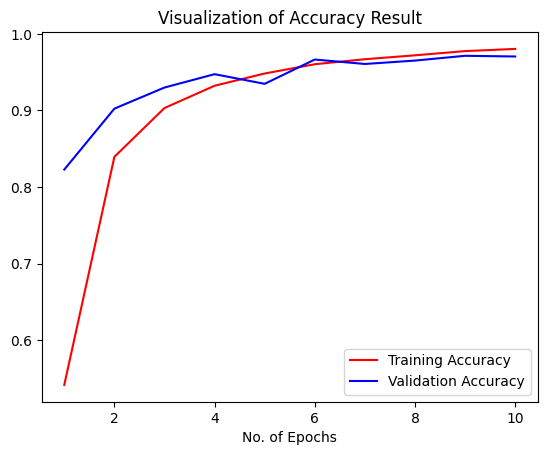

In [28]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

Some other metrics for model evaluation

In [29]:
class_name = validation_set.class_names

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [31]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)


17572/17572 ━━━━━━━━━━━━━━━━━━━━ 768s 44ms/step


In [32]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [33]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], shape=(17572,))>

In [34]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], shape=(17572,))>

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [36]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.94      0.96       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.94      0.99      0.96       440
                                   Apple___healthy       0.95      0.97      0.96       502
                               Blueberry___healthy       0.96      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.93      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.95      0.

Confusion Matrix Visualization

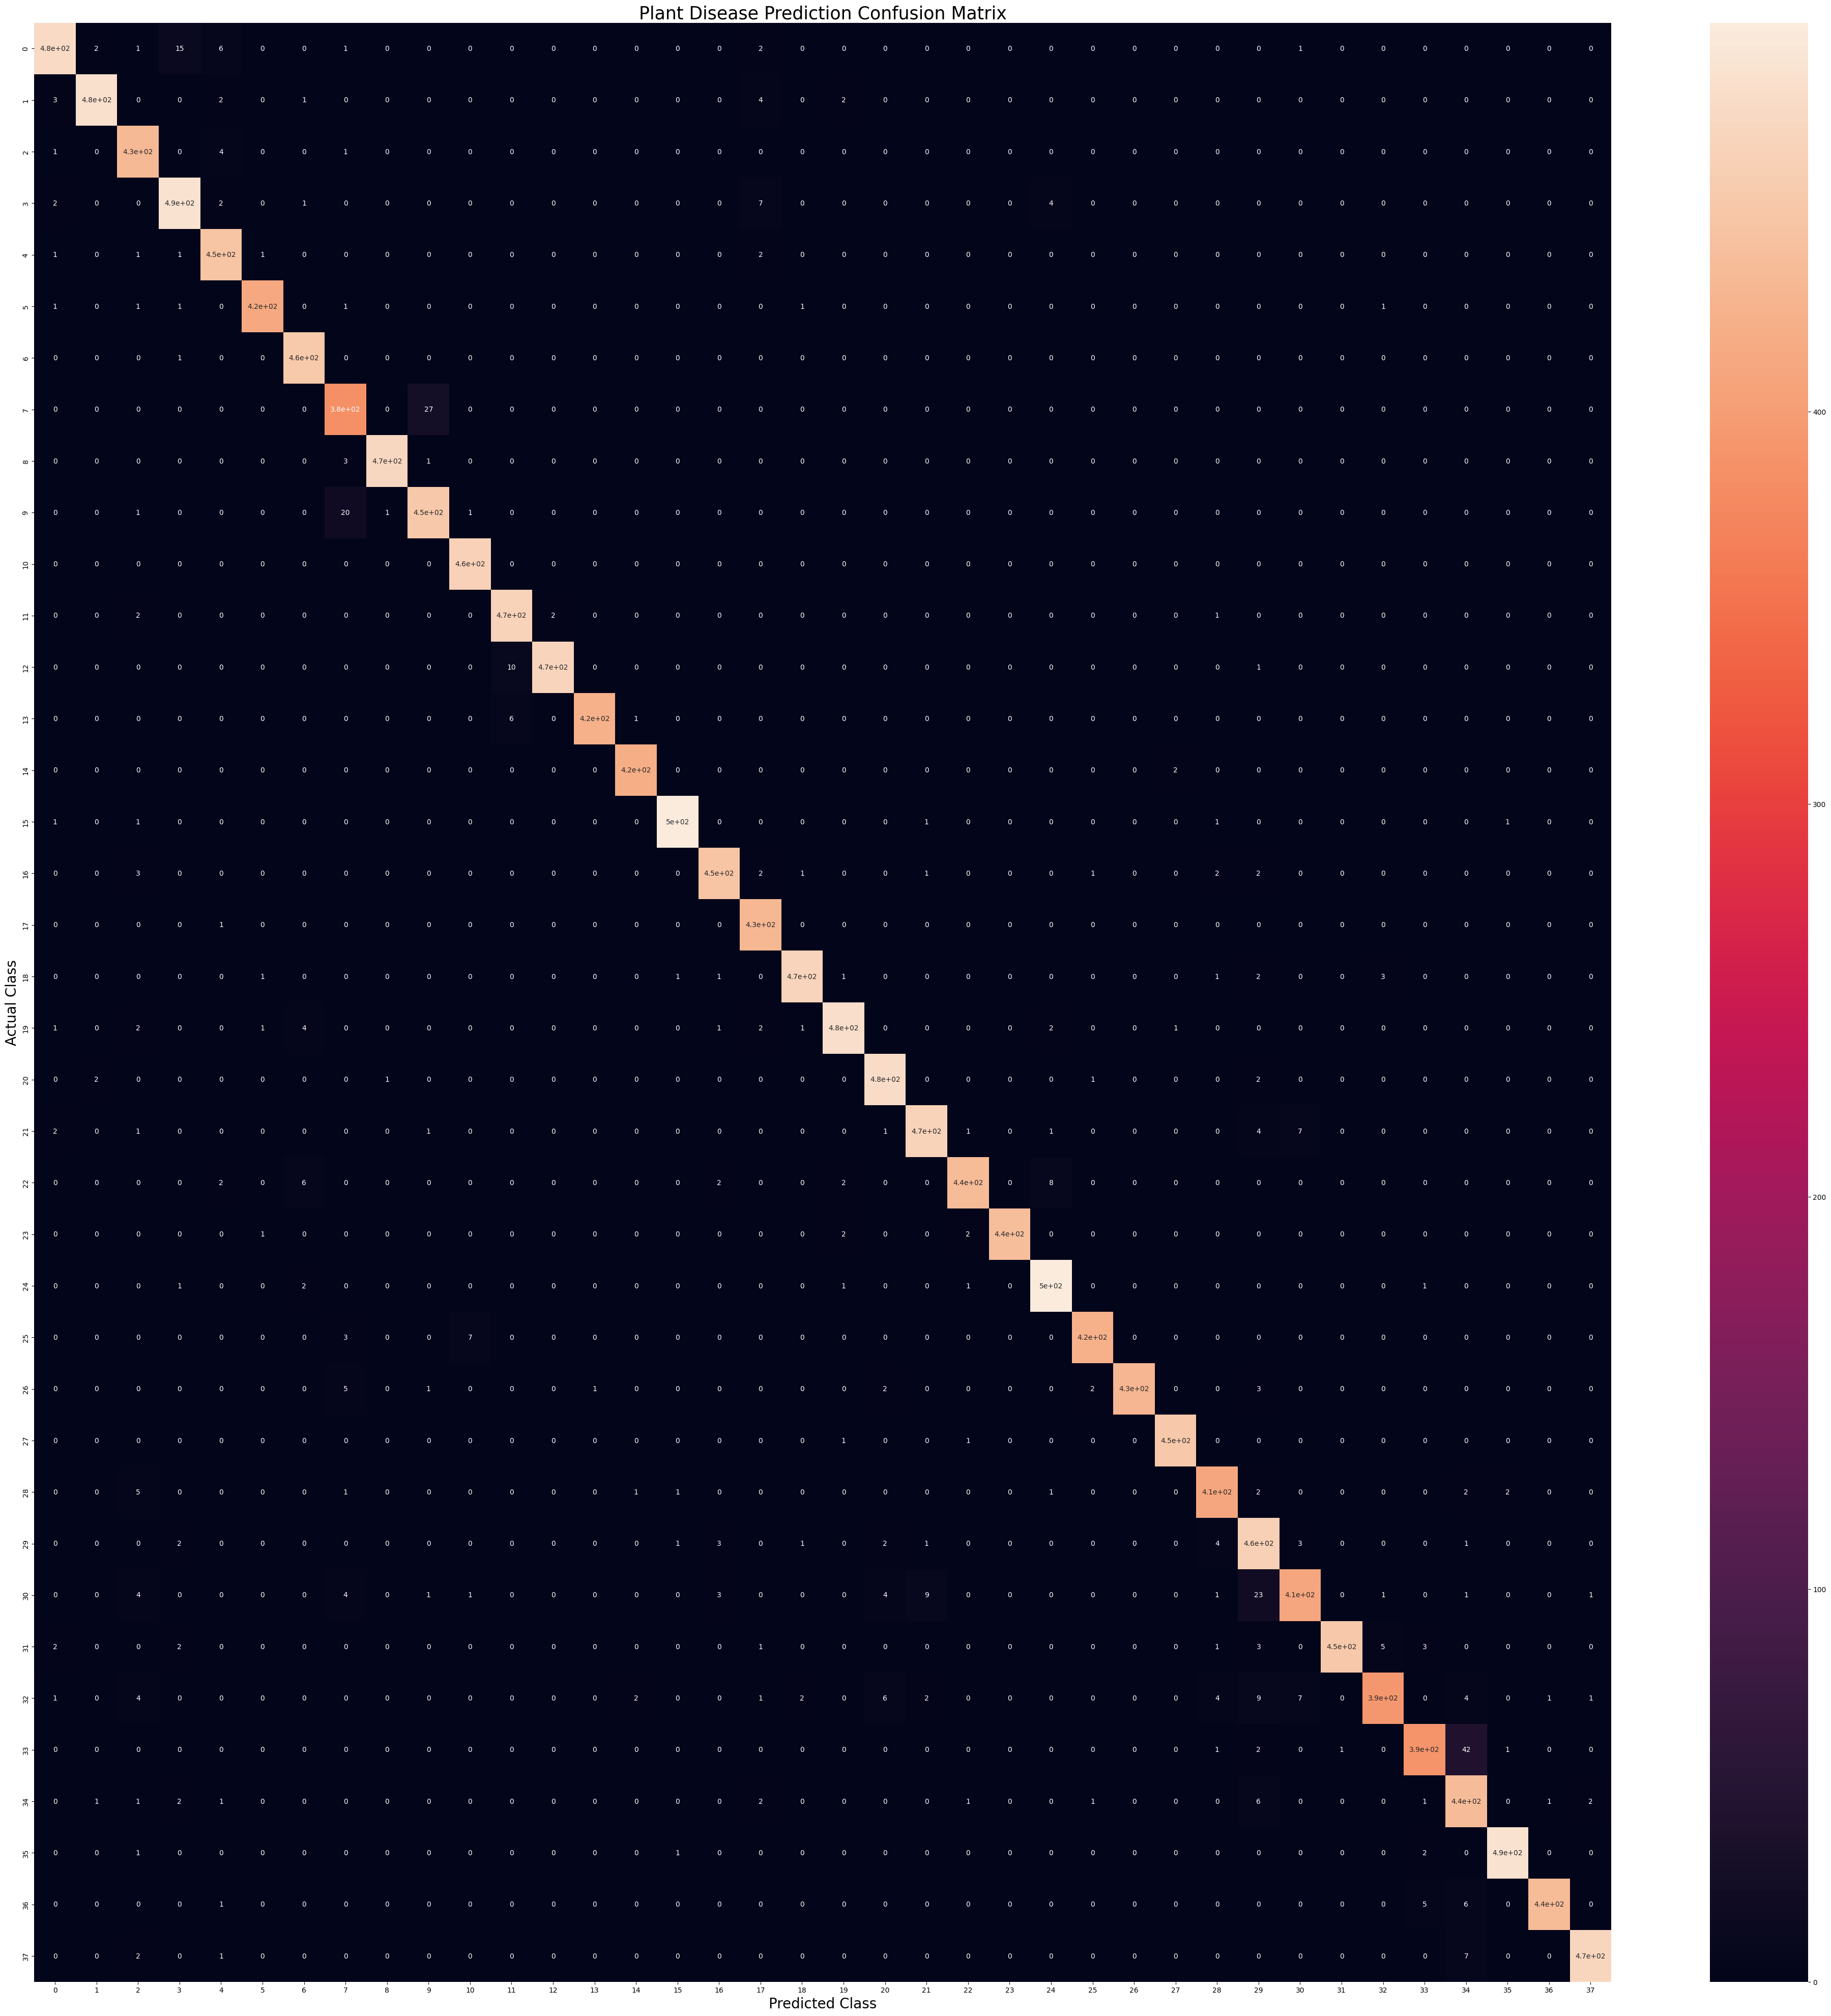

In [40]:
plt.figure(figsize=(50,50))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})
plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()